#**Bi-LSTM MODEL TRAINING - Class - 19**


> In this notebook the Bi-LSTM model was trained based on Attack class 19 Input and the evalation of the model has been done using several evalustion techniques.






## **Importing Required Libraries**
*   Imporitng the required libraries and mounting the drive to train and evaluate the model

In [ ]:
!pip install tensorflow
!pip install shap
!pip install joblib
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install json
!pip install time
!pip install tensorflow-model-optimization

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import gc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Conv1D, MaxPooling1D, Flatten, GaussianNoise
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import tensorflow_model_optimization as tfmot
import time
import json

## Bi-LSTM Model Creation and Training
*   Importing the preprocessed and reshaped dataset from the local directory
*   Defining the Bi-LSTM Model.
*   Training the Bi-LSTM model.

### Importing Dataset

*   Importing the preprocessed and reshaped dataset from the local directory



In [ ]:
file_path = "<preprocessedrnn_data.npz file location for class 19>"
# file_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Preprocessed data/preprocessed_rnn_data_19.npz"

In [ ]:
save_path = "<Enter the save path>"
# save_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result"

In [ ]:
data = np.load(file_path, allow_pickle=True)

# Extract variables
X_train = data["X_train1"]
X_val = data["X_val1"]
X_test = data["X_test1"]
y_train_categorical = data["y_train"]
y_val_categorical = data["y_val"]
y_test_categorical = data["y_test"]
label_classes = data["label_classes"]

label_encoder = LabelEncoder()
label_encoder.classes_ = label_classes

print("Data loaded successfully!")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train_categorical.shape}")

gc.collect()

Data loaded successfully!
X_train shape: (5728664, 1, 45), y_train shape: (5728664, 19)


77

### Model Definition

*   Defining the Bi-LSTM Model.



In [ ]:
# Create an Bi-LSTM model
def create_lstm_model(input_shape, num_classes):

    model = Sequential()

    model = tf.keras.Sequential()


    # First Bi-LSTM Layer (Bidirectional for better sequence learning)
    model.add(Bidirectional(LSTM(32, return_sequences=True), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second Bi-LSTM Layer
    model.add(Bidirectional(LSTM(32)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with Adam optimizer
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Train the Bi-LSTM model with callbacks
def train_model(model, X_train, y_train_categorical, X_val, y_val_categorical, epochs=10, batch_size=32):


    # Early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4)

    # Train model
    history = model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val_categorical),
                        callbacks=[early_stopping, lr_reduction])


    return model, history

### Model Training

*   Training the Bi-LSTM model by defining the Input shape.


In [ ]:
# Define the input shape for the model
input_shape=(1, 45)

# Import and create the Bi-LSTM model
model = create_lstm_model(input_shape, y_train_categorical.shape[1])

import tensorflow as tf
if tf.test.gpu_device_name():
    print('GPU is available!')
else:
    print('GPU is not available. Using CPU.')

# Print the shapes of the training, validation, and test datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# Model Training
model,history = train_model(model, X_train, y_train_categorical, X_val, y_val_categorical)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GPU is not available. Using CPU.
X_train shape: (5728664, 1, 45)
X_val shape: (1432167, 1, 45)
X_test shape: (1614182, 1, 45)
Epoch 1/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 698s 4ms/step - accuracy: 0.8010 - loss: 0.4084 - val_accuracy: 0.9719 - val_loss: 0.0650 - learning_rate: 0.0010
Epoch 2/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 793s 4ms/step - accuracy: 0.9210 - loss: 0.1729 - val_accuracy: 0.9882 - val_loss: 0.0303 - learning_rate: 0.0010
Epoch 3/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 737s 4ms/step - accuracy: 0.9427 - loss: 0.1276 - val_accuracy: 0.9928 - val_loss: 0.0185 - learning_rate: 0.0010
Epoch 4/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 710s 4ms/step - accuracy: 0.9764 - loss: 0.0617 - val_accuracy: 0.9961 - val_loss: 0.0106 - learning_rate: 0.0010
Epoch 5/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 1028s 6ms/step - accuracy: 0.9878 - loss: 0.0359 - val_accuracy: 0.9966 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 6/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 712s 4ms/step - accuracy: 0

## Result Analysis

*   In this section the result has been analysed with the help various evalution matrices.
*   Several graphical representation of the results has been done.


### Calculating Loss, Accuracy, F1 Score, Precission and Recall

In [ ]:
# Evaluate the model on the test data (returns loss and accuracy)
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions and Convert predicted probabilities
y_pred_categorical = model.predict(X_test)
y_pred_encoded = y_pred_categorical.argmax(axis=1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test_decoded = label_encoder.inverse_transform(y_test_categorical.argmax(axis=1))

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_decoded, y_pred)
precision = precision_score(y_test_decoded, y_pred, average='weighted')
recall = recall_score(y_test_decoded, y_pred, average='weighted')
f1 = f1_score(y_test_decoded, y_pred, average='weighted')

# Print all performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

50444/50444 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.8421 - loss: 2.2403
Test Loss: 0.5746
Test Accuracy: 0.9578
50444/50444 ━━━━━━━━━━━━━━━━━━━━ 63s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9578449022477019
Precision: 0.9427973761744579
Recall: 0.9578449022477019
F1-Score: 0.9473734054487954


### Training vs Validation Loss Graph

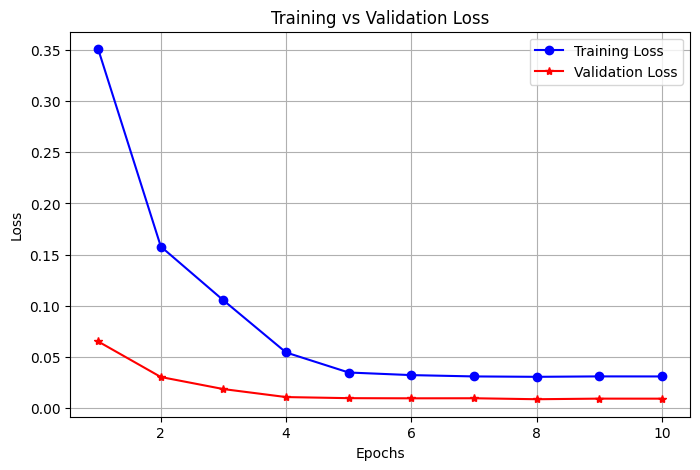

In [ ]:
# Extract training and validation Loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' for blue dots
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')  # 'r*-' for red stars

# Label the axes and add title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()

# Display the plot
plt.show()

### Training vs Validation Accuracy Graph

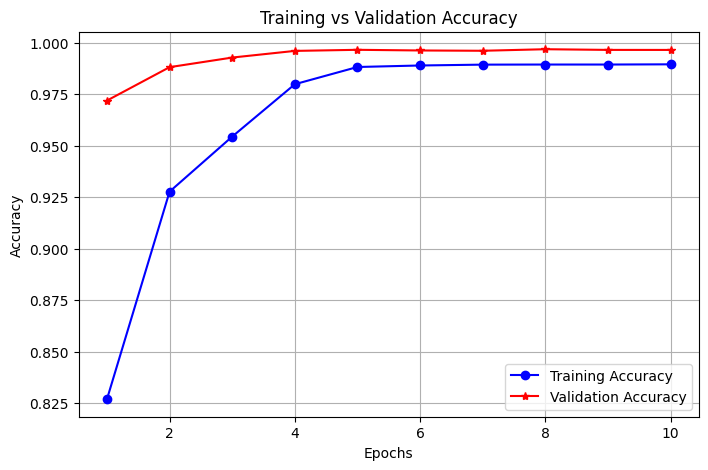

In [ ]:
# Extract training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')

# Label the axes and add title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()

# Display the plot
plt.show()

### Confusion Matrix


Confusion Matrix:
 [[ 37458      0      0      1      6      1      2      0      0      0
       0      0      0      0      3      3    133      0      0]
 [    50 349592      0      0      0     14      1      0      0      0
       0      0      0      0      0     37      5      0      0]
 [    93     13 171780    215      0      1     38     14     30      1
       1      0      0      0     19    144     48      0      0]
 [    69      3      0 182419      0      0      0     10     13      0
       0      0      0      0      0     74     10      0      0]
 [    16     60      0      0 361496      1      0      0    485      0
       0      0      0      0      5      3      4      0      0]
 [    12    323      0      2      0  98034      0      0      0      0
       0      0      0      0      1     36     24      0      0]
 [     1      0   1440      1      0      0  97137      1      0      1
       0      0      0      0      0      0     14      0      0]
 [     0      

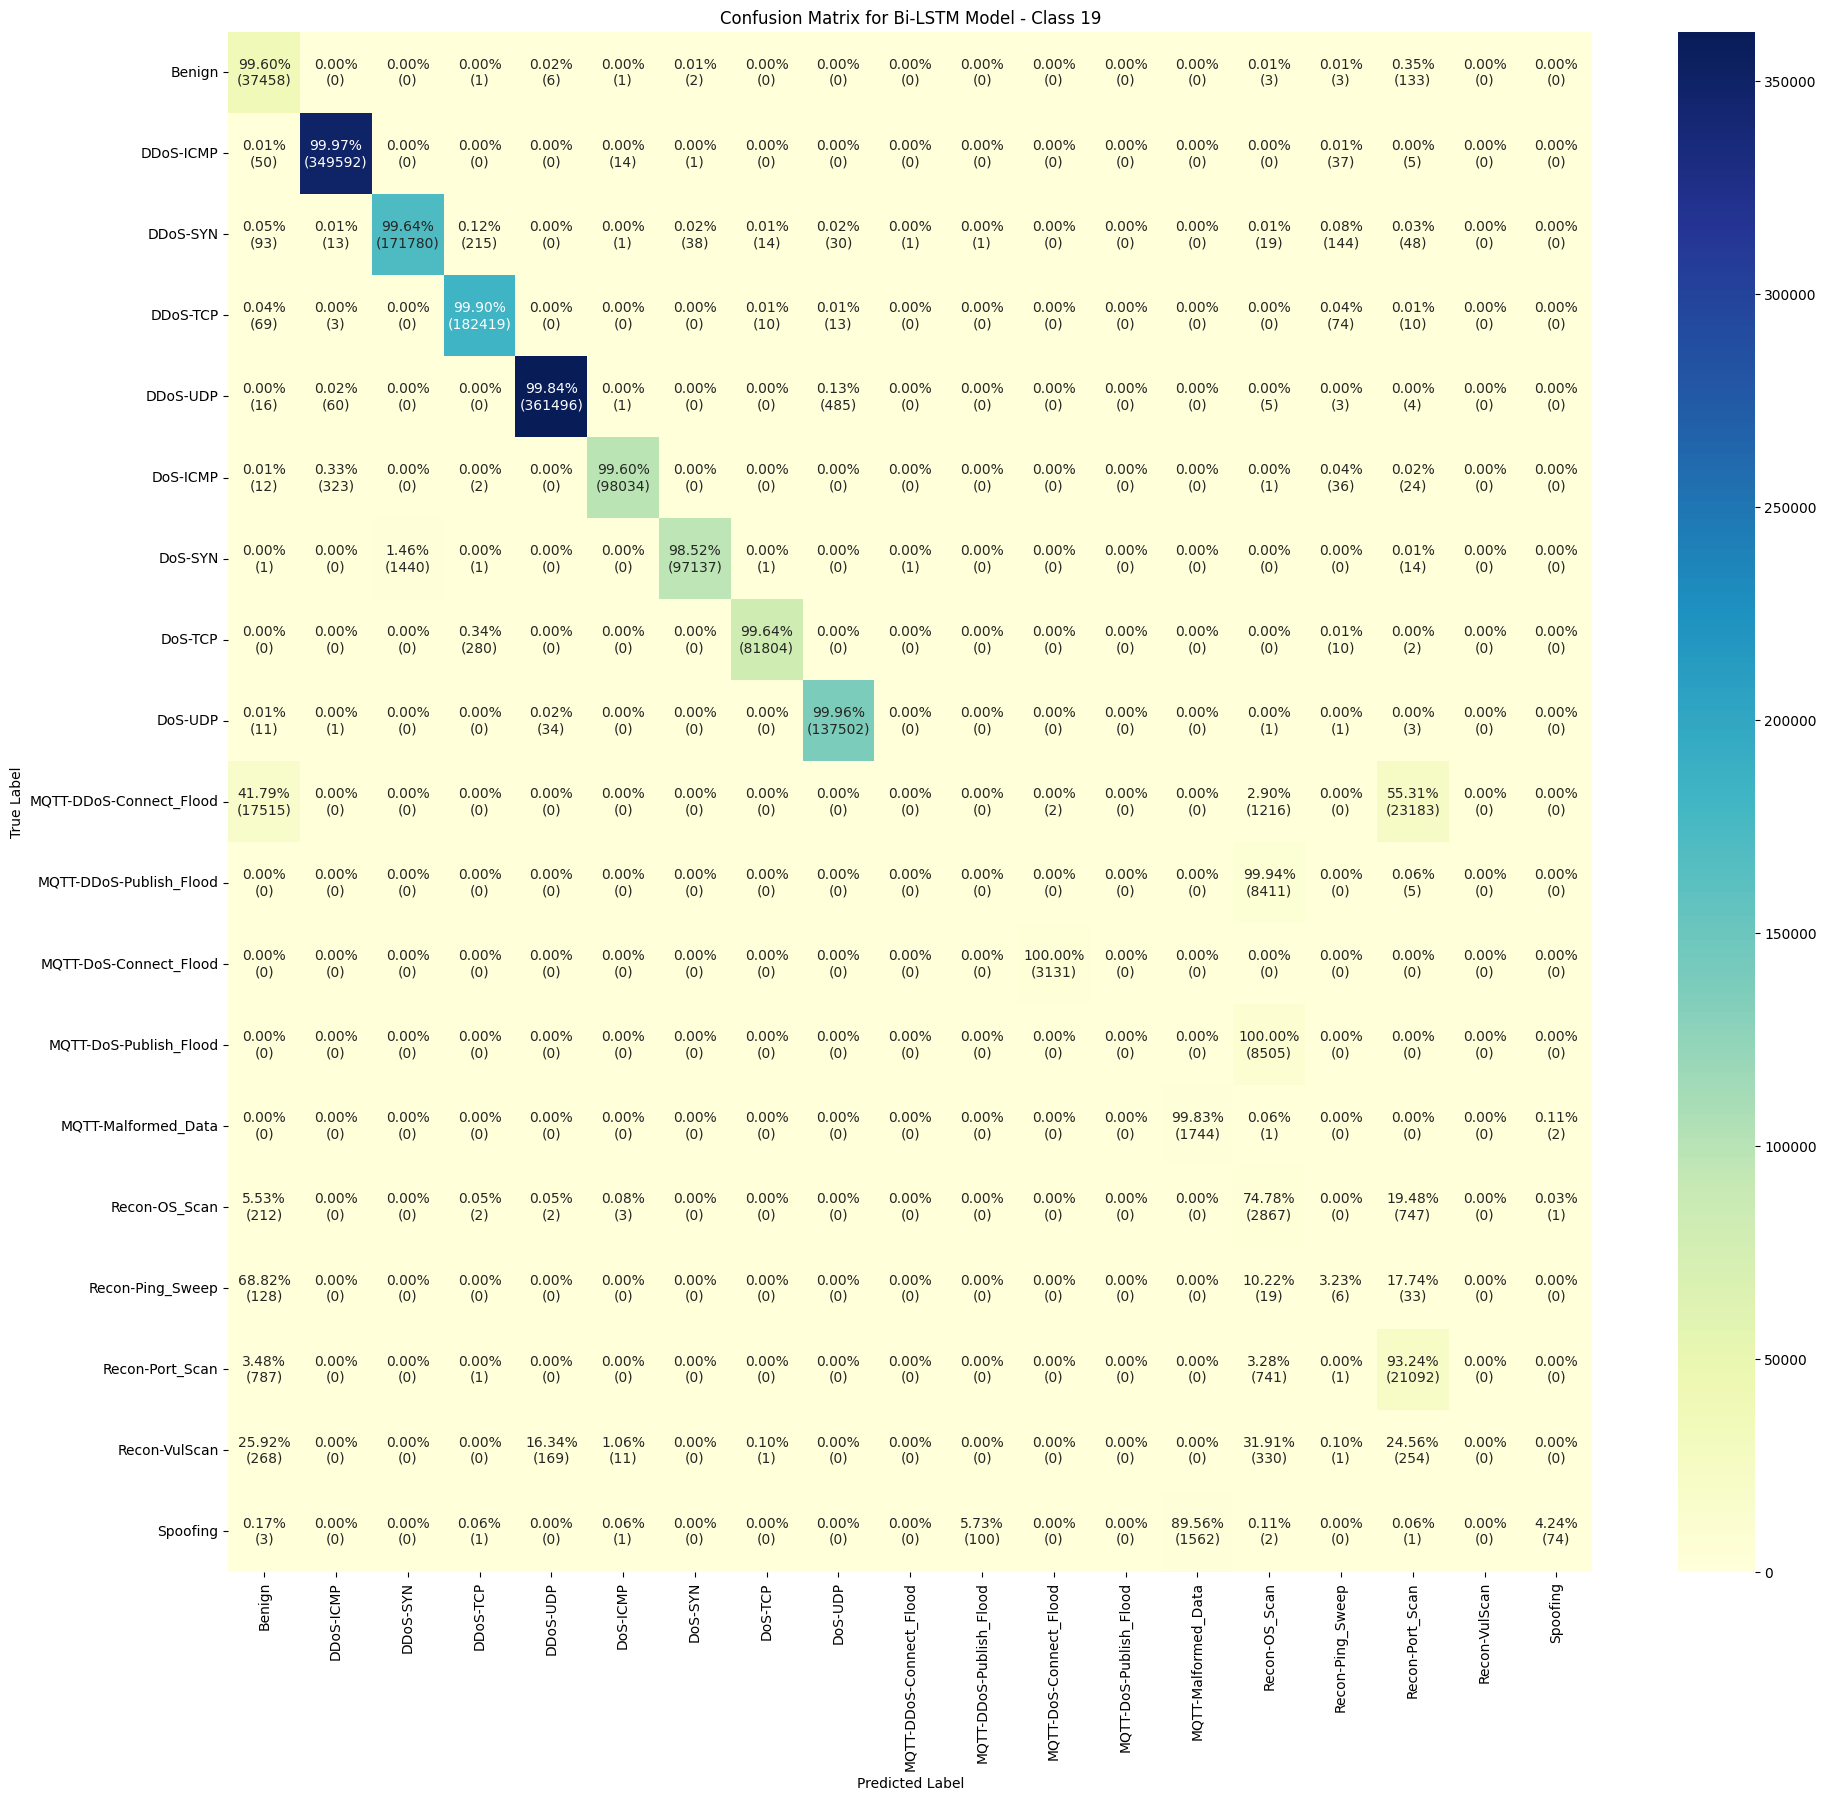

In [ ]:
# Compute the confusion matrix using true and predicted class labels
cm = confusion_matrix(y_test_decoded, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\n \n")
# Normalize the confusion matrix by rows (i.e. true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Prepare the annotations with both counts and percentages
annot = np.empty_like(cm, dtype=object)
row_sums = cm.sum(axis=1)  # Sum of rows for percentage calculation

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        total = row_sums[i]
        percent = cm_normalized[i, j] * 100 if total != 0 else 0
        annot[i, j] = f"{percent:.2f}%\n({count})" if total != 0 else "—"

# Plot the confusion matrix as a heatmap with annotations
plt.figure(figsize=(22, 20))
sns.heatmap(cm, annot=annot, fmt='s', cmap='YlGnBu', xticklabels=np.unique(y_test_decoded), yticklabels=np.unique(y_test_decoded))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bi-LSTM Model - Class 19')

# Display the heatmap
plt.show()

### Test Accuracy and Classification Reprot

In [ ]:
# Print the final accuracy on the test dataset
print("Accuracy on Test Data:", accuracy)

# Print a detailed classification report (precision, recall, f1-score for each class)
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred))

Accuracy on Test Data: 0.9578449022477019


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                          precision    recall  f1-score   support

                 Benign       0.66      1.00      0.80     37607
              DDoS-ICMP       1.00      1.00      1.00    349699
               DDoS-SYN       0.99      1.00      0.99    172397
               DDoS-TCP       1.00      1.00      1.00    182598
               DDoS-UDP       1.00      1.00      1.00    362070
               DoS-ICMP       1.00      1.00      1.00     98432
                DoS-SYN       1.00      0.99      0.99     98595
                DoS-TCP       1.00      1.00      1.00     82096
                DoS-UDP       1.00      1.00      1.00    137553
MQTT-DDoS-Connect_Flood       0.00      0.00      0.00     41916
MQTT-DDoS-Publish_Flood       0.00      0.00      0.00      8416
 MQTT-DoS-Connect_Flood       1.00      1.00      1.00      3131
 MQTT-DoS-Publish_Flood       0.00      0.00      0.00      8505
    MQTT-Malformed_Data       0.53      1.00      0.69      1747

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Evaluating and Saving the Model

*   Saving the evaluated model as.json file for future analysis



In [ ]:
# Save the model
model_filename = 'LSTM_19.h5'

full_save_path = os.path.join(save_path, model_filename)

joblib.dump(model, full_save_path)

Model saved at: /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result/Saved_Model/LSTM_19.h5


In [ ]:
# Evaluate the model and save detailed metrics for comparison
def evaluate_and_save_model(model, X_test, y_test_categorical, history, model_name, save_path):


    # Record the start time of evaluation
    start_eval = time.time()

    # Evaluate the model on test data (returns loss and accuracy)
    loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)

    # Record the end time and calculate how long evaluation took
    end_eval = time.time()
    eval_time = end_eval - start_eval

    # Get predicted probabilities for each class
    y_pred_probs = model.predict(X_test)

    # Convert probabilities to predicted class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Convert one-hot encoded true labels to class labels
    y_true = np.argmax(y_test_categorical, axis=1)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Store all results in a dictionary
    results = {
        "model_name": model_name,
        "accuracy": float(accuracy),
        "loss": float(loss),
        "precision": float(precision),
        "recall": float(recall),
        "f1_score": float(f1),
        "evaluation_time_sec": float(eval_time),
        "confusion_matrix": conf_matrix.tolist(),
        "true_labels": y_true.tolist(),
        "predicted_labels": y_pred.tolist(),
        "predicted_probabilities": y_pred_probs.tolist(),
        "history": history.history  # Training history: loss and accuracy over epochs
    }

    # Save results dictionary as a JSON file
    with open(save_path, "w") as f:
        json.dump(results, f)

    # Print confirmation message
    print(f"Results saved successfully to {save_path}")

file_name = "results_lstm19.json"
save_path = os.path.join(save_file, file_name)

# Bi-LSTM model evaluation and saving results
evaluate(
    model=model,
    X_test=X_test,
    y_test_categorical=y_test_categorical,
    history=history,
    model_name="LSTM",# Ensure y_test is in class indices
    save_path=save_path
)

50444/50444 ━━━━━━━━━━━━━━━━━━━━ 62s 1ms/step
Results saved successfully to /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result/results_lstm19.json
